In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

import BiWAKO

In [2]:
sample = "/Users/gen/Downloads/inference-target.jpg"
human = "/Users/gen/Downloads/IMG_3653.JPG"


## MiDAS

In [2]:
model = BiWAKO.MiDASInference(model="mono_depth_small")

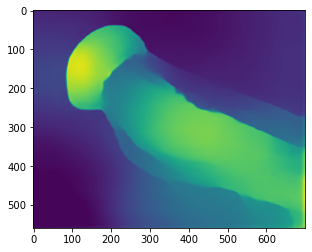

In [4]:
pred = model.predict(sample)
result = model.render(pred, sample)
plt.imshow(result)

## U2Net

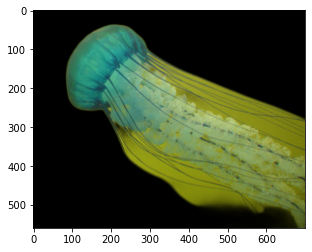

In [5]:
model = BiWAKO.U2NetInference(model="mobile")
pred = model.predict(sample)
result = model.render(pred, sample)
plt.imshow(result)

## RealESRGAN

super_resolution4864.onnx: 67.0MB [00:07, 8.67MB/s]                 


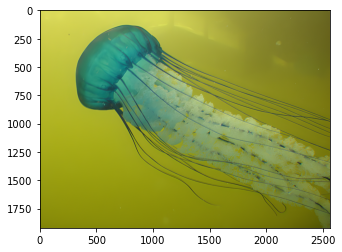

In [6]:
model = BiWAKO.RealESRGANInference(model="super_resolution4864")
pred = model.predict(sample)
result = model.render(pred, sample)
plt.imshow(result)

## YOLO

In [3]:
model = BiWAKO.YOLO(model="yolo_extreme")

In [4]:
cv.imread(human).shape

(687, 662, 3)

In [5]:
model.input_shape

(1280, 1280)

In [8]:
pred = model.predict(human)#[0].flatten()
pred

(1280, 1280, 3)


/Users/gen/github/BiWAKO/BiWAKO/object_detection.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prediction = torch.tensor(prediction)


tensor([2.2454e+01, 3.5189e+01, 1.2137e+03, 1.2716e+03, 9.1534e-01, 0.0000e+00,
        9.1890e+02, 5.6473e+02, 1.0584e+03, 7.7006e+02, 6.9931e-01, 0.0000e+00,
        9.9528e+02, 1.9563e+00, 1.2236e+03, 2.8849e+02, 5.9329e-01, 6.2000e+01,
        1.0356e+03, 3.1878e+02, 1.1266e+03, 4.5555e+02, 3.7643e-01, 6.2000e+01])

In [10]:
plt.imshow(model.render(pred, cv.imread(human)))

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [16]:
human_img = cv.imread(human)

In [9]:
p1, p2 = (pred_from_gt[0], pred_from_gt[1]), (pred_from_gt[2], pred_from_gt[3])

IndexError: list index out of range

In [32]:
lw = max(round(sum(human_img.shape) / 2 * 0.003), 2)
cv.rectangle(human_img, p1, p2, (128, 128, 128), thickness=lw, lineType=cv.LINE_AA)

array([[[ 46,  38,  78],
        [ 46,  38,  78],
        [ 42,  37,  76],
        ...,
        [ 17,  14,  16],
        [ 17,  14,  16],
        [ 17,  14,  16]],

       [[ 48,  40,  80],
        [ 44,  36,  76],
        [ 39,  34,  73],
        ...,
        [ 18,  15,  17],
        [ 17,  14,  16],
        [ 17,  14,  16]],

       [[ 42,  37,  76],
        [ 36,  31,  70],
        [ 33,  28,  67],
        ...,
        [ 18,  15,  17],
        [ 18,  15,  17],
        [ 18,  15,  17]],

       ...,

       [[ 43,  30,  52],
        [ 47,  34,  56],
        [ 45,  32,  54],
        ...,
        [ 61,  83, 171],
        [ 60,  82, 170],
        [ 56,  78, 166]],

       [[ 47,  34,  56],
        [ 50,  37,  59],
        [ 47,  34,  56],
        ...,
        [ 61,  83, 171],
        [ 60,  82, 170],
        [ 56,  78, 166]],

       [[ 48,  35,  57],
        [ 50,  37,  59],
        [ 46,  33,  55],
        ...,
        [ 62,  84, 172],
        [ 61,  83, 171],
        [ 57,  79, 167]]

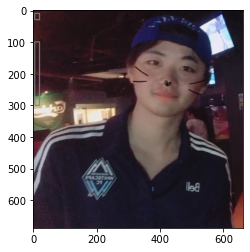

In [34]:
plt.imshow(human_img[:, :, ::-1])

In [5]:
import torch
pred_gt = torch.load("pred.pt")
pred_gt

tensor([[[[5.6024e+00, 4.8994e+00, 8.6053e+00,  ..., 2.0551e-03,
           1.1951e-03, 2.4859e-03],
          [9.0723e+00, 4.0963e+00, 1.1171e+01,  ..., 2.6917e-03,
           1.1141e-03, 2.4868e-03],
          [1.9163e+01, 3.7539e+00, 1.3789e+01,  ..., 3.8210e-03,
           1.3607e-03, 2.8895e-03],
          ...,
          [5.6044e+02, 6.0641e+02, 1.2190e+02,  ..., 6.3978e-03,
           1.6272e-03, 1.7227e-03],
          [5.8581e+02, 6.1848e+02, 1.2095e+02,  ..., 5.7625e-03,
           1.5925e-03, 1.8623e-03],
          [6.3420e+02, 6.2629e+02, 1.2502e+02,  ..., 7.9932e-03,
           1.5910e-03, 2.1693e-03]]]])

In [35]:
pred

tensor([ 8.0905e+00, -3.4352e+00,  6.0085e+02,  6.0147e+02,  4.2954e-01,
         0.0000e+00])

In [6]:
model.non_max_suppression(pred_gt)

/Users/gen/github/BiWAKO/BiWAKO/object_detection.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prediction = torch.tensor(prediction)


[tensor([[5.2310e+00, 4.2406e+01, 6.0754e+02, 6.2395e+02, 4.9047e-01, 0.0000e+00]])]

In [6]:
gt_img = np.load("img.npy")
print(gt_img.shape)
pred_from_gt = model.session.run([model.output_name], {model.input_name: gt_img})

(1, 3, 640, 640)


In [7]:
pred_from_gt

[array([[[5.60241127e+00, 4.89935875e+00, 8.60528088e+00, ...,
          2.05507874e-03, 1.19510293e-03, 2.48593092e-03],
         [9.07232380e+00, 4.09630013e+00, 1.11707268e+01, ...,
          2.69171596e-03, 1.11413002e-03, 2.48676538e-03],
         [1.91628056e+01, 3.75388432e+00, 1.37894325e+01, ...,
          3.82101536e-03, 1.36074424e-03, 2.88948417e-03],
         ...,
         [5.60435242e+02, 6.06405151e+02, 1.21902718e+02, ...,
          6.39778376e-03, 1.62723660e-03, 1.72269344e-03],
         [5.85805786e+02, 6.18483093e+02, 1.20949844e+02, ...,
          5.76254725e-03, 1.59251690e-03, 1.86225772e-03],
         [6.34199219e+02, 6.26285400e+02, 1.25021721e+02, ...,
          7.99316168e-03, 1.59102678e-03, 2.16925144e-03]]], dtype=float32)]

In [14]:
bb_test = model.non_max_suppression(torch.tensor(pred_from_gt))[0].flatten()

<IPython.core.display.Javascript object>

/Users/gen/github/BiWAKO/BiWAKO/object_detection.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prediction = torch.tensor(prediction)


In [19]:
p1, p2 = (int(bb_test[0]), int(bb_test[1])), (int(bb_test[2]), int(bb_test[3]))
lw = max(round(sum(human_img.shape) / 2 * 0.003), 2)
cv.rectangle(human_img, p1, p2, (128, 128, 128), thickness=lw, lineType=cv.LINE_AA)

array([[[ 46,  38,  78],
        [ 46,  38,  78],
        [ 42,  37,  76],
        ...,
        [ 17,  14,  16],
        [ 17,  14,  16],
        [ 17,  14,  16]],

       [[ 48,  40,  80],
        [ 44,  36,  76],
        [ 39,  34,  73],
        ...,
        [ 18,  15,  17],
        [ 17,  14,  16],
        [ 17,  14,  16]],

       [[ 42,  37,  76],
        [ 36,  31,  70],
        [ 33,  28,  67],
        ...,
        [ 18,  15,  17],
        [ 18,  15,  17],
        [ 18,  15,  17]],

       ...,

       [[ 43,  30,  52],
        [ 47,  34,  56],
        [ 45,  32,  54],
        ...,
        [ 61,  83, 171],
        [ 60,  82, 170],
        [ 56,  78, 166]],

       [[ 47,  34,  56],
        [ 50,  37,  59],
        [ 47,  34,  56],
        ...,
        [ 61,  83, 171],
        [ 60,  82, 170],
        [ 56,  78, 166]],

       [[ 48,  35,  57],
        [ 50,  37,  59],
        [ 46,  33,  55],
        ...,
        [ 62,  84, 172],
        [ 61,  83, 171],
        [ 57,  79, 167]]

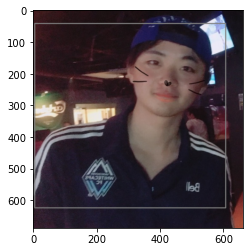

In [20]:
plt.imshow(human_img[:, :, ::-1])